In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-52.527986496252694 -14.551401481844579
63.63122535063613 163.4415815862069
52.70385847920835 19.32240487714418
-26.016820377460036 -129.331047121056
22.318877354202755 -135.86222886664598
-50.39491974468802 -92.63085241636321
-50.84977135924882 148.93415240468352
58.41672190640824 -60.30025945982558
18.125178452590845 150.9298251044563
-75.6519396362629 -156.99620876017624
-33.10273133329817 154.67824808315913
24.024712526804564 161.06481424088298
-58.15620085562537 88.71936853410972
30.841383517792977 -122.87452310298251
73.76515925308033 -87.21612500357487
-53.94013114581752 124.14399109071798
15.731276095210475 87.82623220518644
72.5490326531336 144.86269690025682
37.47033347048112 -103.06555197428742
6.644095309272714 71.87137480753316
-34.84501303757176 -77.35310402875257
-87.64090459728581 -70.26023540483044
-58.57288127276081 0.7403366492603709
75.9237936466537 -96.21934086378465
-24.43673749019679 -17.858778029501792
54.63748339404529 -150.50478276695867
59.45306223427718 -157

-55.9098075300413 70.13745642176471
-53.33086919004369 -109.05147109987945
-79.78714413926532 -114.45767668660055
69.77424040968867 -50.489496049984865
6.844547869059198 -155.89339452787289
-86.99892296714708 68.09752339796768
-42.82530173811162 10.844371022635272
-19.531233150078194 -26.057485890665134
83.92240210071176 -141.89790966482173
30.094514063600244 45.20807540466268
-1.1448429088957823 -96.92966240477266
-42.91550631390167 155.07859719006382
-64.63306517038768 -141.01777023930538
-69.16185820721844 -22.22954672973586
-28.124445004564308 81.93226435289853
-37.42143191292301 -63.39890942156464
-67.62511441906065 -51.654087009997
-54.058108292724256 -45.2445156737856
-89.13391635546928 -3.967019300647536
73.82240077905416 115.52154479922399
21.685472019811414 -105.11732432050024
39.938238914822534 155.89362059653973
-18.61653960240527 11.767558072393086
-67.02803877948975 -108.48383801854466
16.57679705771963 112.62509873240936
73.23256752548812 76.25000550095052
-24.1967568406

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [7]:
# Import requests libraray
import requests

# Import the API key
from config import weather_api_key

import time
from datetime import datetime

In [8]:
# starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


for i, city in enumerate(cities):
    
# Group cities in sets of 50 for logging purposes  
    if (i % 50 == 0 and i >=50):
        set_count+= 1
        record_count  = 1
        time.sleep(60)
        
# create end point url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
# Log the URL, record, and set numbers and the city.  
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

# Add 1 to the record count.
    record_count += 1

 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 3 of Set 1 | lipno
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | saint-augustin
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | port macquarie
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | puri
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | lamar
Processing Record 20 of Set 1 | kulhudhuffushi
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 

Processing Record 39 of Set 4 | verkhoyansk
Processing Record 40 of Set 4 | rodbyhavn
Processing Record 41 of Set 4 | palmer
Processing Record 42 of Set 4 | leningradskiy
Processing Record 43 of Set 4 | cairns
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | tuatapere
Processing Record 46 of Set 4 | portland
Processing Record 47 of Set 4 | xining
Processing Record 48 of Set 4 | sancti spiritus
Processing Record 49 of Set 4 | moffat
Processing Record 50 of Set 4 | touros
Processing Record 1 of Set 5 | caloundra
Processing Record 2 of Set 5 | tolga
Processing Record 3 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 5 | meulaboh
Processing Record 5 of Set 5 | taltal
Processing Record 6 of Set 5 | tasiilaq
Processing Record 7 of Set 5 | husavik
Processing Record 8 of Set 5 | daru
Processing Record 9 of Set 5 | senanga
Processing Record 10 of Set 5 | marcona
City not found. Skipping...
Processing Record 11 of Set 5 | magdalena
Processin

Processing Record 28 of Set 8 | poya
Processing Record 29 of Set 8 | sibu
Processing Record 30 of Set 8 | tabarqah
City not found. Skipping...
Processing Record 31 of Set 8 | miri
Processing Record 32 of Set 8 | mehtar lam
Processing Record 33 of Set 8 | cruzeiro do sul
Processing Record 34 of Set 8 | longyearbyen
Processing Record 35 of Set 8 | flinders
Processing Record 36 of Set 8 | chatellerault
Processing Record 37 of Set 8 | ponta do sol
Processing Record 38 of Set 8 | taoudenni
Processing Record 39 of Set 8 | coffs harbour
Processing Record 40 of Set 8 | sangar
Processing Record 41 of Set 8 | lunglei
Processing Record 42 of Set 8 | buffalo
Processing Record 43 of Set 8 | beatrice
Processing Record 44 of Set 8 | san patricio
Processing Record 45 of Set 8 | kharan
Processing Record 46 of Set 8 | lexington park
Processing Record 47 of Set 8 | awbari
Processing Record 48 of Set 8 | sao filipe
Processing Record 49 of Set 8 | stepnyak
Processing Record 50 of Set 8 | bad waldsee
Proces

Processing Record 16 of Set 12 | malanje
Processing Record 17 of Set 12 | bolgatanga
Processing Record 18 of Set 12 | soure
Processing Record 19 of Set 12 | kribi
Processing Record 20 of Set 12 | rio grande
Processing Record 21 of Set 12 | waipawa
Processing Record 22 of Set 12 | moissac
Processing Record 23 of Set 12 | fortuna
Processing Record 24 of Set 12 | gidam
Processing Record 25 of Set 12 | sampit
Processing Record 26 of Set 12 | takapau
Processing Record 27 of Set 12 | tefe
Processing Record 28 of Set 12 | rorvik
Processing Record 29 of Set 12 | grand gaube
Processing Record 30 of Set 12 | necochea
Processing Record 31 of Set 12 | wschowa
Processing Record 32 of Set 12 | belaya gora
Processing Record 33 of Set 12 | saraland
Processing Record 34 of Set 12 | vanimo
Processing Record 35 of Set 12 | pahalgam
Processing Record 36 of Set 12 | coreau
Processing Record 37 of Set 12 | batagay-alyta
Processing Record 38 of Set 12 | nantucket
Processing Record 39 of Set 12 | porto velho


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
len(city_data)
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,80.02,49,40,6.91,US,2022-09-17 19:31:20
1,Lipno,52.8444,19.1785,52.21,89,35,7.02,PL,2022-09-17 19:36:08
2,Rikitea,-23.1203,-134.9692,72.54,76,0,20.20,PF,2022-09-17 19:34:16
3,Hilo,19.7297,-155.0900,90.28,65,0,5.99,US,2022-09-17 19:34:50
4,Castro,-24.7911,-50.0119,58.68,63,0,9.82,BR,2022-09-17 19:36:08
5,Hobart,-42.8794,147.3294,46.06,88,40,8.05,AU,2022-09-17 19:36:09
6,Saint-Augustin,51.2260,-58.6502,58.95,45,23,21.45,CA,2022-09-17 19:36:09
7,Airai,-8.9266,125.4092,57.85,73,99,1.81,TL,2022-09-17 19:36:10
8,Mataura,-46.1927,168.8643,39.99,85,95,3.65,NZ,2022-09-17 19:36:10
9,Port Macquarie,-31.4333,152.9167,53.46,64,7,7.31,AU,2022-09-17 19:31:33


In [10]:
# rearange colmuns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-09-17 19:31:20,42.0970,-79.2353,80.02,49,40,6.91
1,Lipno,PL,2022-09-17 19:36:08,52.8444,19.1785,52.21,89,35,7.02
2,Rikitea,PF,2022-09-17 19:34:16,-23.1203,-134.9692,72.54,76,0,20.20
3,Hilo,US,2022-09-17 19:34:50,19.7297,-155.0900,90.28,65,0,5.99
4,Castro,BR,2022-09-17 19:36:08,-24.7911,-50.0119,58.68,63,0,9.82
5,Hobart,AU,2022-09-17 19:36:09,-42.8794,147.3294,46.06,88,40,8.05
6,Saint-Augustin,CA,2022-09-17 19:36:09,51.2260,-58.6502,58.95,45,23,21.45
7,Airai,TL,2022-09-17 19:36:10,-8.9266,125.4092,57.85,73,99,1.81
8,Mataura,NZ,2022-09-17 19:36:10,-46.1927,168.8643,39.99,85,95,3.65
9,Port Macquarie,AU,2022-09-17 19:31:33,-31.4333,152.9167,53.46,64,7,7.31


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

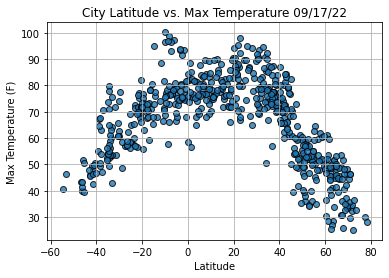

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor ="black", linewidths = 1, marker = "o", alpha =0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()


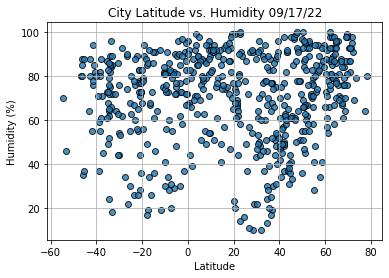

In [15]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor ="black", linewidths = 1, marker = "o", alpha =0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

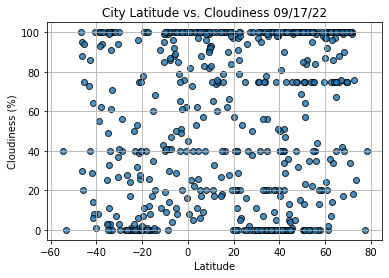

In [16]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor ="black", linewidths = 1, marker = "o", alpha =0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

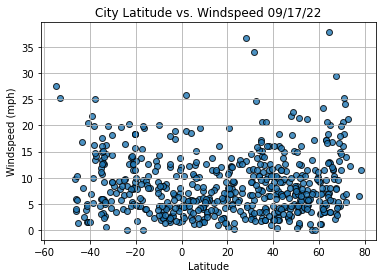

In [18]:
# Build the scatter plot for latitude vs. windspeed
plt.scatter(lats, wind_speed, edgecolor ="black", linewidths = 1, marker = "o", alpha =0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Windspeed "+ time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()

In [25]:
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2022-09-17 19:36:11
Lat                        77.484
Lng                      -69.3632
Max Temp                    30.04
Humidity                       64
Cloudiness                      0
Wind Speed                   6.51
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
575     True
576     True
577     True
578     True
579    False
Name: Lat, Length: 580, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-09-17 19:31:20,42.0970,-79.2353,80.02,49,40,6.91
1,Lipno,PL,2022-09-17 19:36:08,52.8444,19.1785,52.21,89,35,7.02
3,Hilo,US,2022-09-17 19:34:50,19.7297,-155.0900,90.28,65,0,5.99
6,Saint-Augustin,CA,2022-09-17 19:36:09,51.2260,-58.6502,58.95,45,23,21.45
10,Hasaki,JP,2022-09-17 19:36:10,35.7333,140.8333,77.40,88,100,11.14


In [34]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-09-17 19:31:20,42.0970,-79.2353,80.02,49,40,6.91
1,Lipno,PL,2022-09-17 19:36:08,52.8444,19.1785,52.21,89,35,7.02
3,Hilo,US,2022-09-17 19:34:50,19.7297,-155.0900,90.28,65,0,5.99
6,Saint-Augustin,CA,2022-09-17 19:36:09,51.2260,-58.6502,58.95,45,23,21.45
10,Hasaki,JP,2022-09-17 19:36:10,35.7333,140.8333,77.40,88,100,11.14
...,...,...,...,...,...,...,...,...,...
574,Mineral Wells,US,2022-09-17 19:47:45,32.8085,-98.1128,94.64,46,20,11.50
575,Aberdeen,GB,2022-09-17 19:46:44,57.1437,-2.0981,51.49,89,20,6.91
576,Shache,CN,2022-09-17 19:50:46,38.4167,77.2406,69.80,31,100,2.75
577,Zhangye,CN,2022-09-17 19:50:47,38.9342,100.4517,70.27,40,100,1.03


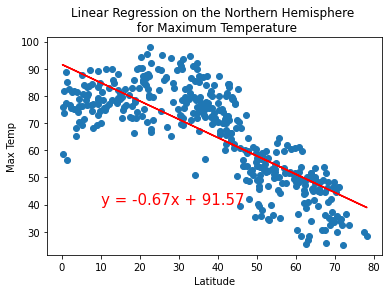

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# call the function
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

                       
                       
                       

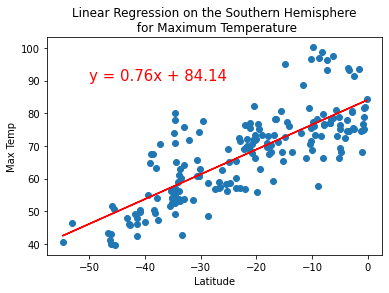

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

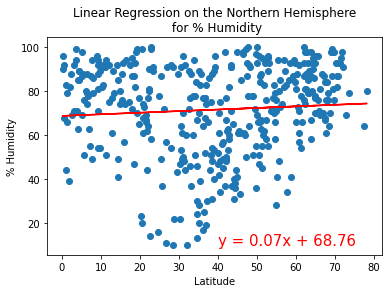

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

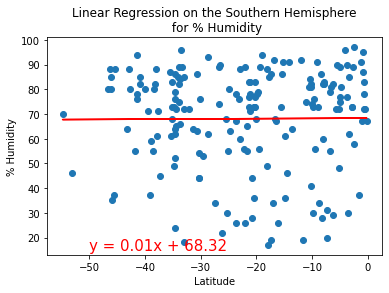

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

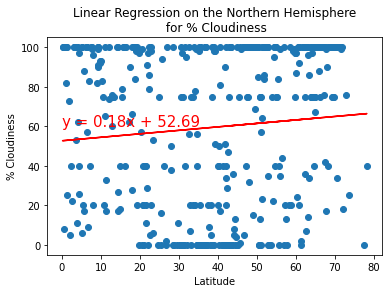

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness', '% Cloudiness',(0,60))

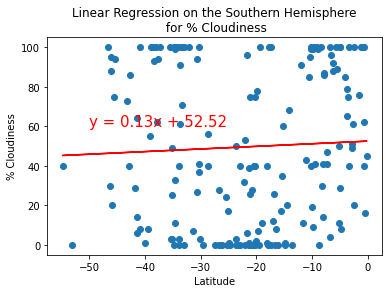

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

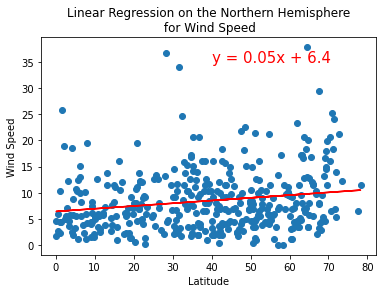

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(40,35))

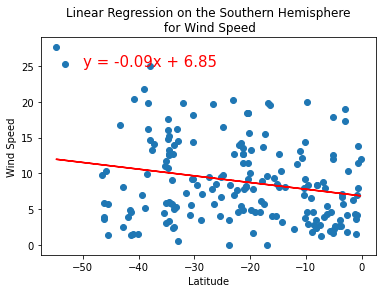

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,25))
